<a href="https://colab.research.google.com/github/yuseongil034/yuseongil/blob/main/0716_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ 라이브러리 로드 완료!
🔥 PyTorch 버전: 2.6.0+cu124
💻 CUDA 사용 가능: True
🎯 ImageNet 1000개 클래스 분류기 실행 옵션:
1. 단일 이미지 분류: classify_uploaded_image()
2. 다중 모델 비교: compare_multiple_models()
3. 여러 이미지 일괄 분류: batch_classify()

💡 추천: classify_uploaded_image() 로 시작하세요!

🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등
📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리

⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!
🚀 ImageNet 1000개 클래스 분류기 시작!
📁 이미지를 업로드해주세요...
🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!


Saving kento-hirasue-1FUP2FeOcT8-unsplash.jpg to kento-hirasue-1FUP2FeOcT8-unsplash (1).jpg
📷 업로드된 파일: kento-hirasue-1FUP2FeOcT8-unsplash (1).jpg
🧠 resnet50 모델 로딩 중...
💻 사용 디바이스: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

📋 ImageNet 라벨 로드 완료: 1000개
✅ resnet50 모델 준비 완료!
📊 분류 가능한 클래스: 1000개
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 5):
1. trailer truck                  83.85%
2. minivan                        1.24%
3. aircraft carrier               1.07%
4. alp                            0.85%
5. recreational vehicle           0.78%


/tmp/ipython-input-22-2406466660.py:210: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


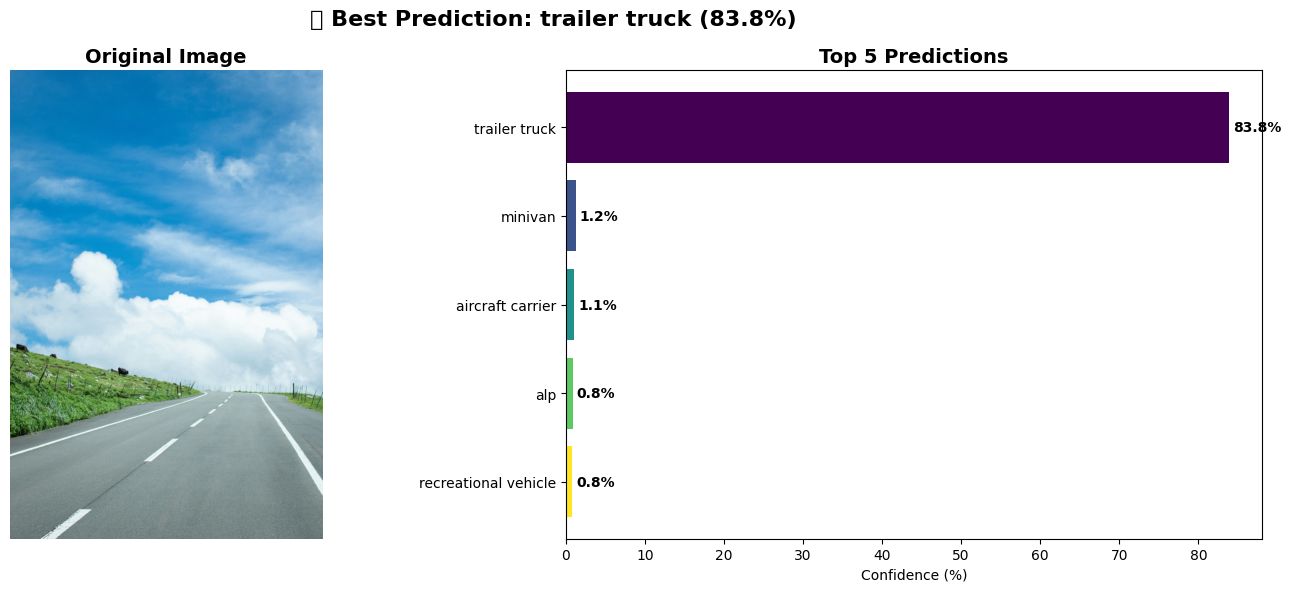


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cuda
   📋 총 클래스 수: 1000

✅ ImageNet 분류 완료!


{'original_image': <PIL.Image.Image image mode=RGB size=3533x5299>,
 'predictions': [{'rank': 1,
   'class_index': 867,
   'class_name': 'trailer truck',
   'probability': 0.8384815454483032,
   'percentage': 83.84815454483032},
  {'rank': 2,
   'class_index': 656,
   'class_name': 'minivan',
   'probability': 0.012390884570777416,
   'percentage': 1.2390884570777416},
  {'rank': 3,
   'class_index': 403,
   'class_name': 'aircraft carrier',
   'probability': 0.010658176615834236,
   'percentage': 1.0658176615834236},
  {'rank': 4,
   'class_index': 970,
   'class_name': 'alp',
   'probability': 0.008466897532343864,
   'percentage': 0.8466897532343864},
  {'rank': 5,
   'class_index': 757,
   'class_name': 'recreational vehicle',
   'probability': 0.0077819786965847015,
   'percentage': 0.7781978696584702},
  {'rank': 6,
   'class_index': 807,
   'class_name': 'solar dish',
   'probability': 0.0057448032312095165,
   'percentage': 0.5744803231209517},
  {'rank': 7,
   'class_index': 8

In [22]:
# 📦 Google Colab용 ImageNet 1000개 클래스 분류기
# 🧠 사전 훈련된 딥러닝 모델로 즉시 객체 인식!

# 필요한 라이브러리 설치 및 임포트
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from io import BytesIO
import cv2

print("✅ 라이브러리 로드 완료!")
print(f"🔥 PyTorch 버전: {torch.__version__}")
print(f"💻 CUDA 사용 가능: {torch.cuda.is_available()}")

# =============================================================================
# ImageNet 1000개 클래스 분류기
# =============================================================================

class ImageNetClassifier:
    """ImageNet 사전 훈련된 모델을 사용한 1000개 클래스 분류기"""

    def __init__(self, model_name='resnet50'):
        print(f"🧠 {model_name} 모델 로딩 중...")
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"💻 사용 디바이스: {self.device}")

        # 모델 로드
        self.model = self.load_model(model_name)
        self.model.eval()  # 평가 모드

        # ImageNet 클래스 라벨 로드
        self.class_labels = self.load_imagenet_labels()

        # 이미지 전처리 설정
        self.transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        print(f"✅ {model_name} 모델 준비 완료!")
        print(f"📊 분류 가능한 클래스: 1000개")

    def load_model(self, model_name):
        """사전 훈련된 모델 로드"""
        models_dict = {
            'resnet50': models.resnet50(pretrained=True),
            'resnet101': models.resnet101(pretrained=True),
            'vgg16': models.vgg16(pretrained=True),
            'vgg19': models.vgg19(pretrained=True),
            'densenet121': models.densenet121(pretrained=True),
            'efficientnet_b0': models.efficientnet_b0(pretrained=True),
            'mobilenet_v2': models.mobilenet_v2(pretrained=True),
            'alexnet': models.alexnet(pretrained=True),
            'inception_v3': models.inception_v3(pretrained=True)
        }

        if model_name not in models_dict:
            print(f"⚠️ {model_name} 모델을 찾을 수 없습니다. ResNet50을 사용합니다.")
            model_name = 'resnet50'

        model = models_dict[model_name]
        return model.to(self.device)

    def load_imagenet_labels(self):
        """ImageNet 1000개 클래스 라벨 로드"""
        try:
            # ImageNet 클래스 라벨 다운로드
            url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
            response = requests.get(url)
            labels = response.text.strip().split('\n')
            print(f"📋 ImageNet 라벨 로드 완료: {len(labels)}개")
            return labels
        except:
            print("⚠️ 온라인 라벨 로드 실패. 기본 라벨을 사용합니다.")
            # 일부 주요 클래스만 포함한 기본 라벨
            return [f"class_{i}" for i in range(1000)]

    def load_image(self, image_source):
        """이미지 로드 (파일 경로 또는 URL)"""
        try:
            if isinstance(image_source, str):
                if image_source.startswith('http'):
                    # URL에서 이미지 다운로드
                    response = requests.get(image_source)
                    image = Image.open(BytesIO(response.content)).convert('RGB')
                else:
                    # 로컬 파일
                    image = Image.open(image_source).convert('RGB')
            else:
                # PIL Image 객체
                image = image_source.convert('RGB')

            return image
        except Exception as e:
            print(f"❌ 이미지 로드 실패: {e}")
            return None

    def preprocess_image(self, image):
        """이미지 전처리"""
        if image is None:
            return None

        # PIL Image → Tensor
        tensor = self.transform(image).unsqueeze(0)  # 배치 차원 추가
        return tensor.to(self.device)

    def predict(self, image_source, top_k=5):
        """이미지 분류 예측"""
        print(f"🔍 이미지 분석 중...")

        # 이미지 로드
        image = self.load_image(image_source)
        if image is None:
            return None

        original_image = image.copy()

        # 전처리
        input_tensor = self.preprocess_image(image)
        if input_tensor is None:
            return None

        # 예측
        with torch.no_grad():
            outputs = self.model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

        # Top-K 결과 추출
        top_prob, top_indices = torch.topk(probabilities, top_k)

        results = []
        for i in range(top_k):
            class_idx = top_indices[i].item()
            prob = top_prob[i].item()
            class_name = self.class_labels[class_idx]
            results.append({
                'rank': i + 1,
                'class_index': class_idx,
                'class_name': class_name,
                'probability': prob,
                'percentage': prob * 100
            })

        return {
            'original_image': original_image,
            'predictions': results,
            'model_info': {
                'model_name': self.model.__class__.__name__,
                'device': str(self.device),
                'total_classes': len(self.class_labels)
            }
        }

    def visualize_results(self, results, show_top_k=5):
        """결과 시각화"""
        if results is None:
            print("❌ 결과가 없습니다.")
            return

        # 결과 출력
        print(f"\n🎯 ImageNet 분류 결과 (Top {show_top_k}):")
        print("=" * 60)

        predictions = results['predictions'][:show_top_k]

        for pred in predictions:
            print(f"{pred['rank']}. {pred['class_name']:<30} {pred['percentage']:.2f}%")

        print("=" * 60)

        # 시각화
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # 원본 이미지
        ax1.imshow(results['original_image'])
        ax1.set_title('Original Image', fontsize=14, fontweight='bold')
        ax1.axis('off')

        # 예측 결과 막대 그래프
        class_names = [pred['class_name'][:20] for pred in predictions]  # 이름 길이 제한
        probabilities = [pred['percentage'] for pred in predictions]
        colors = plt.cm.viridis(np.linspace(0, 1, len(predictions)))

        bars = ax2.barh(range(len(predictions)), probabilities, color=colors)
        ax2.set_yticks(range(len(predictions)))
        ax2.set_yticklabels(class_names)
        ax2.set_xlabel('Confidence (%)')
        ax2.set_title(f'Top {show_top_k} Predictions', fontsize=14, fontweight='bold')
        ax2.invert_yaxis()  # 높은 확률이 위로

        # 막대에 퍼센트 표시
        for i, (bar, prob) in enumerate(zip(bars, probabilities)):
            ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{prob:.1f}%', va='center', fontweight='bold')

        # 전체 제목
        best_prediction = predictions[0]
        plt.suptitle(f'🏆 Best Prediction: {best_prediction["class_name"]} ({best_prediction["percentage"]:.1f}%)',
                    fontsize=16, fontweight='bold')

        plt.tight_layout()
        plt.show()

        # 모델 정보
        model_info = results['model_info']
        print(f"\n📊 모델 정보:")
        print(f"   🧠 모델: {model_info['model_name']}")
        print(f"   💻 디바이스: {model_info['device']}")
        print(f"   📋 총 클래스 수: {model_info['total_classes']}")

    def compare_models(self, image_source, model_names=['resnet50', 'vgg16', 'efficientnet_b0']):
        """여러 모델 성능 비교"""
        print(f"🔄 다중 모델 비교 시작...")

        original_model = self.model
        original_name = original_model.__class__.__name__

        results_comparison = []

        for model_name in model_names:
            print(f"\n🧠 {model_name} 모델로 예측 중...")

            # 모델 변경
            self.model = self.load_model(model_name)
            self.model.eval()

            # 예측
            result = self.predict(image_source, top_k=3)
            if result:
                best_pred = result['predictions'][0]
                results_comparison.append({
                    'model_name': model_name,
                    'best_class': best_pred['class_name'],
                    'confidence': best_pred['percentage'],
                    'top3': result['predictions']
                })

        # 원래 모델 복원
        self.model = original_model

        # 비교 결과 시각화
        if results_comparison:
            self.visualize_model_comparison(results_comparison, image_source)

        return results_comparison

    def visualize_model_comparison(self, results_comparison, image_source):
        """모델 비교 결과 시각화"""
        # 이미지 로드
        image = self.load_image(image_source)

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 원본 이미지
        axes[0, 0].imshow(image)
        axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')

        # 각 모델별 Top 1 결과
        model_names = [result['model_name'] for result in results_comparison]
        confidences = [result['confidence'] for result in results_comparison]
        predictions = [result['best_class'][:15] for result in results_comparison]  # 이름 단축

        colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(model_names)]

        bars = axes[0, 1].bar(model_names, confidences, color=colors, alpha=0.7)
        axes[0, 1].set_title('Model Confidence Comparison', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Confidence (%)')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # 막대에 예측 클래스와 확률 표시
        for bar, pred, conf in zip(bars, predictions, confidences):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                           f'{pred}\n{conf:.1f}%', ha='center', va='bottom', fontsize=10)

        # 상세 비교 테이블
        axes[1, 0].axis('off')
        table_data = []
        for result in results_comparison:
            row = [result['model_name'], result['best_class'][:20], f"{result['confidence']:.1f}%"]
            table_data.append(row)

        table = axes[1, 0].table(cellText=table_data,
                                colLabels=['Model', 'Best Prediction', 'Confidence'],
                                cellLoc='center',
                                loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1, 0].set_title('Detailed Comparison', fontsize=14, fontweight='bold')

        # 모델별 Top 3 비교
        axes[1, 1].axis('off')
        y_pos = 0.9
        for result in results_comparison:
            axes[1, 1].text(0.05, y_pos, f"🧠 {result['model_name']}:", fontweight='bold', fontsize=12)
            y_pos -= 0.08
            for i, pred in enumerate(result['top3']):
                axes[1, 1].text(0.1, y_pos, f"{i+1}. {pred['class_name'][:25]} ({pred['percentage']:.1f}%)",
                               fontsize=10)
                y_pos -= 0.06
            y_pos -= 0.02

        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].set_title('Top 3 Predictions per Model', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()

# =============================================================================
# 실행 함수들
# =============================================================================

def classify_uploaded_image():
    """파일 업로드 후 ImageNet 분류"""
    print("🚀 ImageNet 1000개 클래스 분류기 시작!")
    print("=" * 60)

    # 파일 업로드
    print("📁 이미지를 업로드해주세요...")
    print("🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!")

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # 분류기 생성
        classifier = ImageNetClassifier(model_name='resnet50')

        # 예측
        results = classifier.predict(filename, top_k=10)

        # 결과 시각화
        classifier.visualize_results(results, show_top_k=5)

        print("\n✅ ImageNet 분류 완료!")
        return results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def compare_multiple_models():
    """여러 모델로 동일 이미지 비교"""
    print("🔄 다중 모델 성능 비교!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # 분류기 생성
        classifier = ImageNetClassifier()

        # 여러 모델 비교
        models_to_compare = ['resnet50', 'vgg16', 'efficientnet_b0', 'mobilenet_v2']
        comparison_results = classifier.compare_models(filename, models_to_compare)

        print("\n✅ 다중 모델 비교 완료!")
        return comparison_results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def batch_classify():
    """여러 이미지 일괄 업로드 분류"""
    print("📁 여러 이미지 일괄 분류!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    try:
        classifier = ImageNetClassifier()
        results_list = []

        for filename in uploaded.keys():
            print(f"\n🔍 {filename} 분석 중...")
            results = classifier.predict(filename, top_k=5)

            if results:
                # 간단한 결과 출력
                best_pred = results['predictions'][0]
                print(f"🏆 {filename}: {best_pred['class_name']} ({best_pred['percentage']:.1f}%)")
                results_list.append((filename, best_pred['class_name'], best_pred['percentage']))

        # 전체 결과 요약
        print(f"\n{'='*60}")
        print("📋 일괄 분류 결과 요약")
        print(f"{'='*60}")
        for filename, pred_class, confidence in results_list:
            print(f"📷 {filename:25} → {pred_class:20} ({confidence:.1f}%)")

        return results_list

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

# =============================================================================
# 메인 실행 부분
# =============================================================================

print("🎯 ImageNet 1000개 클래스 분류기 실행 옵션:")
print("1. 단일 이미지 분류: classify_uploaded_image()")
print("2. 다중 모델 비교: compare_multiple_models()")
print("3. 여러 이미지 일괄 분류: batch_classify()")
print("\n💡 추천: classify_uploaded_image() 로 시작하세요!")
print("\n🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등")
print("📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리")
print("\n⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!")

# 사용자가 직접 함수 호출
classify_uploaded_image()

✅ 라이브러리 로드 완료!
🔥 PyTorch 버전: 2.6.0+cu124
💻 CUDA 사용 가능: True
🎯 다중 이미지 ImageNet 분류기 실행 옵션:
1. 다중 이미지 상세 분류: classify_multiple_uploaded_images()
2. 다중 모델 비교: classify_with_different_models()
3. 빠른 분류: quick_classify()

💡 추천: classify_multiple_uploaded_images() 로 시작하세요!

🧠 지원 모델: ResNet50, EfficientNet-B0, MobileNet-V2 등
📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리
📈 새로운 기능: 대시보드, CSV 내보내기, 통계 분석

⚡ 준비 완료! 다중 이미지 분류기 시작!
🚀 다중 이미지 ImageNet 분류기 시작!
📁 여러 이미지를 업로드해주세요...
🎯 각 이미지를 1000개 클래스로 분류합니다!


Saving john-towner-3Kv48NS4WUU-unsplash.jpg to john-towner-3Kv48NS4WUU-unsplash (2).jpg
Saving kento-hirasue-1FUP2FeOcT8-unsplash.jpg to kento-hirasue-1FUP2FeOcT8-unsplash (2).jpg
Saving joshua-sortino-XMcoTHgNcQA-unsplash.jpg to joshua-sortino-XMcoTHgNcQA-unsplash (1).jpg
Saving luke-stackpoole-ZRsJmpt9pNI-unsplash.jpg to luke-stackpoole-ZRsJmpt9pNI-unsplash (1).jpg
Saving amanda-sandlin-jIdKrtJF8Uk-unsplash.jpg to amanda-sandlin-jIdKrtJF8Uk-unsplash (1).jpg
Saving connor-mcsheffrey-MIspM6HIit8-unsplash.jpg to connor-mcsheffrey-MIspM6HIit8-unsplash (1).jpg
Saving brendan-steeves-G-YAJ61qIuU-unsplash.jpg to brendan-steeves-G-YAJ61qIuU-unsplash (1).jpg
Saving diego-jimenez-A-NVHPka9Rk-unsplash.jpg to diego-jimenez-A-NVHPka9Rk-unsplash (1).jpg
Saving mark-basarab-z8ct_Q3oCqM-unsplash.jpg to mark-basarab-z8ct_Q3oCqM-unsplash (1).jpg
Saving holden-baxter-oxQ0egaQMfU-unsplash.jpg to holden-baxter-oxQ0egaQMfU-unsplash (1).jpg
📷 업로드된 파일: 10개
🧠 resnet50 모델 로딩 중...
💻 사용 디바이스: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date we

📋 ImageNet 라벨 로드 완료: 1000개
✅ resnet50 모델 준비 완료!
📊 분류 가능한 클래스: 1000개
🔍 10개 이미지 분석 시작...
📷 (1/10) 처리 중: john-towner-3Kv48NS4WUU-unsplash (2).jpg
📷 (2/10) 처리 중: kento-hirasue-1FUP2FeOcT8-unsplash (2).jpg
📷 (3/10) 처리 중: joshua-sortino-XMcoTHgNcQA-unsplash (1).jpg
📷 (4/10) 처리 중: luke-stackpoole-ZRsJmpt9pNI-unsplash (1).jpg
📷 (5/10) 처리 중: amanda-sandlin-jIdKrtJF8Uk-unsplash (1).jpg
📷 (6/10) 처리 중: connor-mcsheffrey-MIspM6HIit8-unsplash (1).jpg
📷 (7/10) 처리 중: brendan-steeves-G-YAJ61qIuU-unsplash (1).jpg
📷 (8/10) 처리 중: diego-jimenez-A-NVHPka9Rk-unsplash (1).jpg
📷 (9/10) 처리 중: mark-basarab-z8ct_Q3oCqM-unsplash (1).jpg
📷 (10/10) 처리 중: holden-baxter-oxQ0egaQMfU-unsplash (1).jpg
✅ 총 10개 이미지 처리 완료!

📊 개별 이미지 결과:


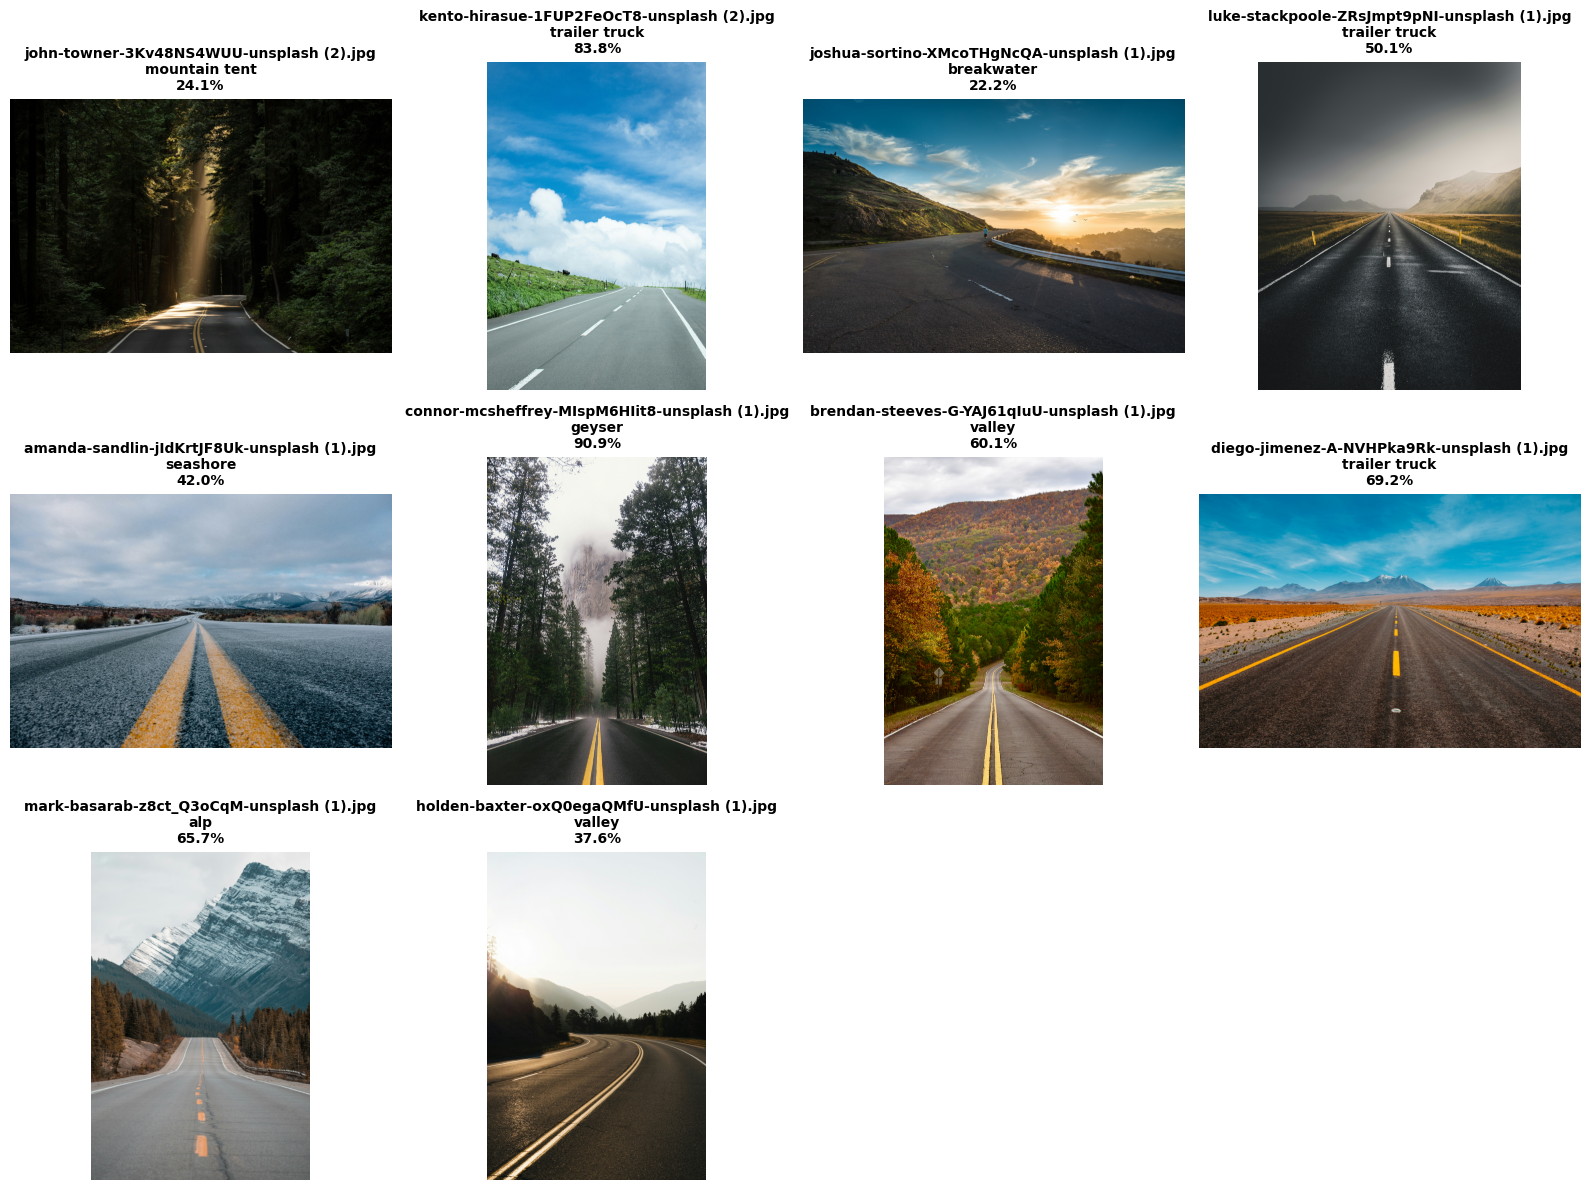


📈 분석 대시보드:


/tmp/ipython-input-24-1993526479.py:319: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-1993526479.py:319: UserWarning: Glyph 47280 (\N{HANGUL SYLLABLE ROE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-1993526479.py:319: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-1993526479.py:319: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-1993526479.py:319: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-1993526479.py:319: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-1993526479.py:319: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans

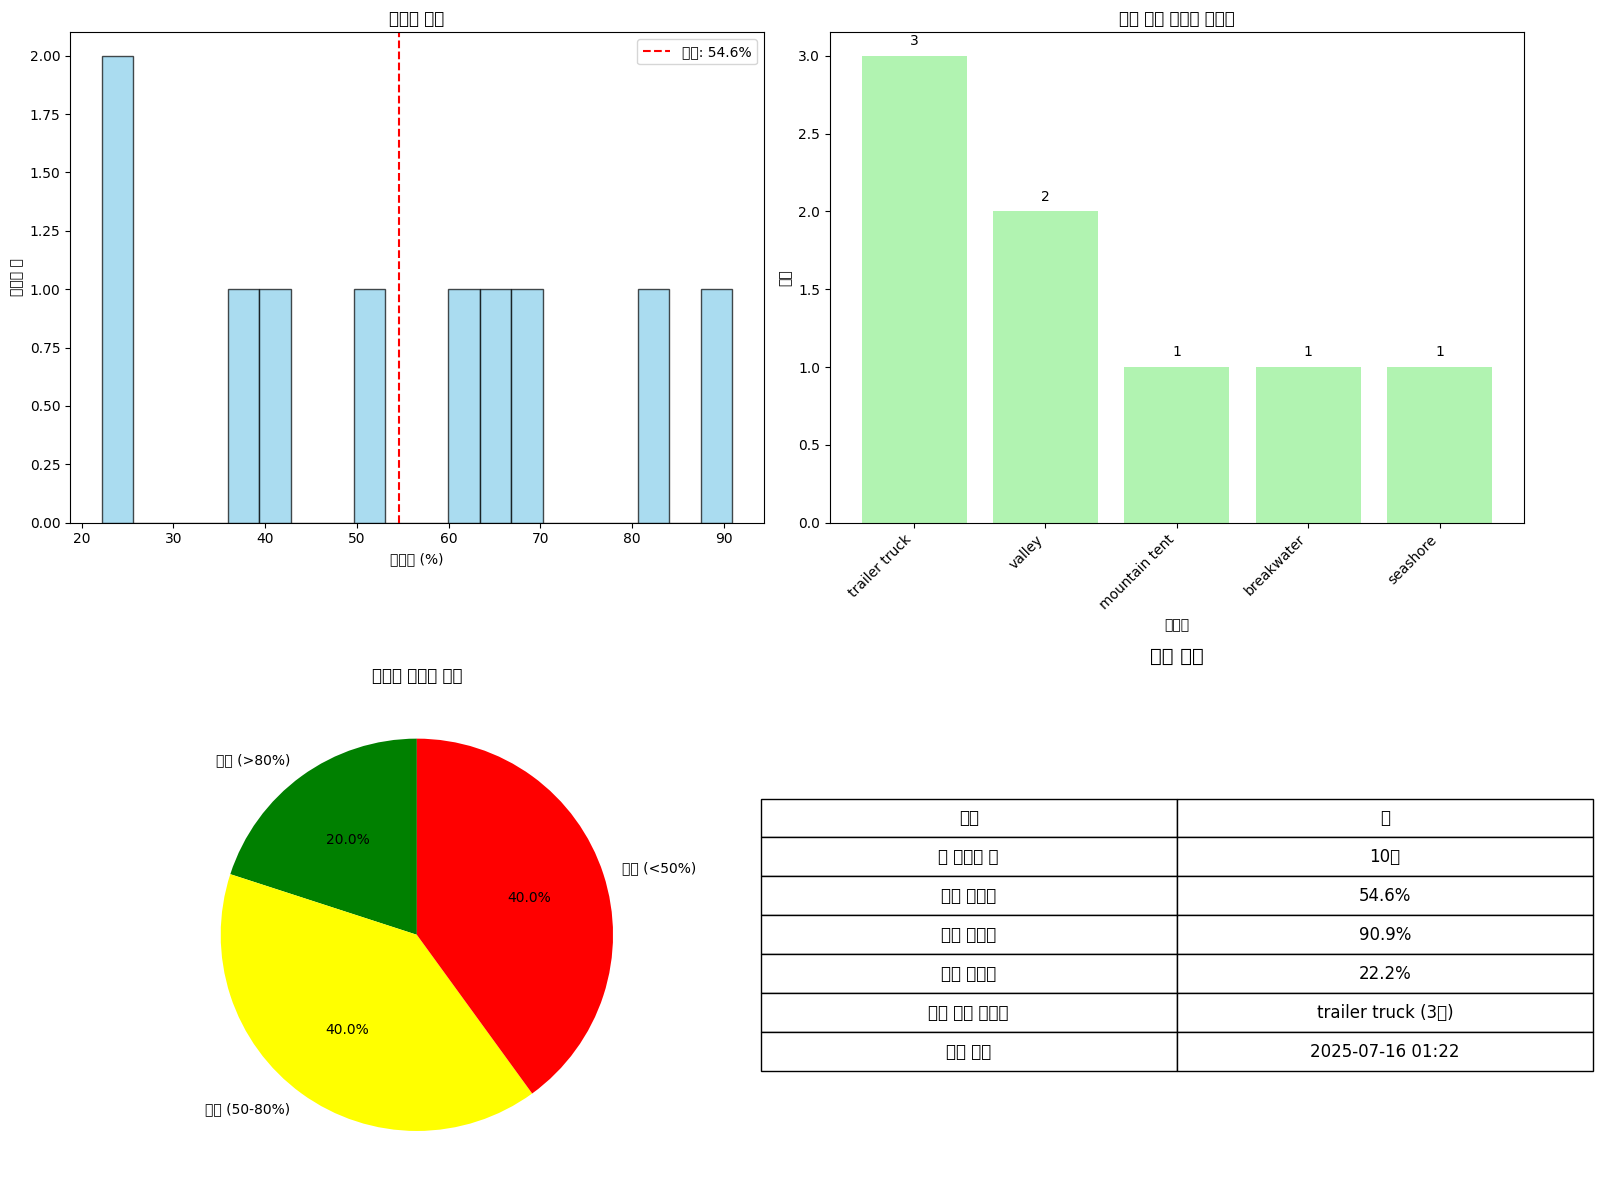


📋 분석 요약
🔢 총 이미지 수: 10개
📊 평균 신뢰도: 54.6%
🏆 가장 많이 예측된 클래스:
   1. trailer truck: 3개
   2. valley: 2개
   3. mountain tent: 1개

💾 결과를 CSV 파일로 내보내시겠습니까? (y/n): y
📊 결과가 holden-baxter-oxQ0egaQMfU-unsplash (1).jpg에 저장되었습니다.

✅ 다중 이미지 분류 완료!


[{'image': <PIL.Image.Image image mode=RGB size=4096x2731>,
  'predictions': [{'rank': 1,
    'class_index': 672,
    'class_name': 'mountain tent',
    'probability': 0.24114106595516205,
    'percentage': 24.114106595516205},
   {'rank': 2,
    'class_index': 562,
    'class_name': 'fountain',
    'probability': 0.0778636708855629,
    'percentage': 7.78636708855629},
   {'rank': 3,
    'class_index': 979,
    'class_name': 'valley',
    'probability': 0.07625970244407654,
    'percentage': 7.625970244407654}],
  'filename': 'john-towner-3Kv48NS4WUU-unsplash (2).jpg'},
 {'image': <PIL.Image.Image image mode=RGB size=3533x5299>,
  'predictions': [{'rank': 1,
    'class_index': 867,
    'class_name': 'trailer truck',
    'probability': 0.8384815454483032,
    'percentage': 83.84815454483032},
   {'rank': 2,
    'class_index': 656,
    'class_name': 'minivan',
    'probability': 0.012390884570777416,
    'percentage': 1.2390884570777416},
   {'rank': 3,
    'class_index': 403,
    'clas

In [24]:
# 📦 개선된 다중 이미지 ImageNet 1000개 클래스 분류기
# 🧠 여러 이미지를 동시에 분석하고 결과를 시각화!

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from io import BytesIO
import cv2
import os
from datetime import datetime
import pandas as pd

print("✅ 라이브러리 로드 완료!")
print(f"🔥 PyTorch 버전: {torch.__version__}")
print(f"💻 CUDA 사용 가능: {torch.cuda.is_available()}")

# =============================================================================
# 개선된 다중 이미지 ImageNet 분류기
# =============================================================================

class MultiImageClassifier:
    """다중 이미지 ImageNet 분류기"""

    def __init__(self, model_name='resnet50'):
        print(f"🧠 {model_name} 모델 로딩 중...")
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"💻 사용 디바이스: {self.device}")

        # 모델 로드
        self.model = self.load_model(model_name)
        self.model.eval()
        self.model_name = model_name

        # ImageNet 클래스 라벨 로드
        self.class_labels = self.load_imagenet_labels()

        # 이미지 전처리 설정
        self.transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        print(f"✅ {model_name} 모델 준비 완료!")
        print(f"📊 분류 가능한 클래스: 1000개")

    def load_model(self, model_name):
        """사전 훈련된 모델 로드"""
        models_dict = {
            'resnet50': models.resnet50(pretrained=True),
            'resnet101': models.resnet101(pretrained=True),
            'vgg16': models.vgg16(pretrained=True),
            'vgg19': models.vgg19(pretrained=True),
            'densenet121': models.densenet121(pretrained=True),
            'efficientnet_b0': models.efficientnet_b0(pretrained=True),
            'mobilenet_v2': models.mobilenet_v2(pretrained=True),
            'alexnet': models.alexnet(pretrained=True),
            'inception_v3': models.inception_v3(pretrained=True)
        }

        if model_name not in models_dict:
            print(f"⚠️ {model_name} 모델을 찾을 수 없습니다. ResNet50을 사용합니다.")
            model_name = 'resnet50'

        model = models_dict[model_name]
        return model.to(self.device)

    def load_imagenet_labels(self):
        """ImageNet 1000개 클래스 라벨 로드"""
        try:
            url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
            response = requests.get(url)
            labels = response.text.strip().split('\n')
            print(f"📋 ImageNet 라벨 로드 완료: {len(labels)}개")
            return labels
        except:
            print("⚠️ 온라인 라벨 로드 실패. 기본 라벨을 사용합니다.")
            return [f"class_{i}" for i in range(1000)]

    def load_image(self, image_source):
        """이미지 로드 (파일 경로 또는 URL)"""
        try:
            if isinstance(image_source, str):
                if image_source.startswith('http'):
                    response = requests.get(image_source)
                    image = Image.open(BytesIO(response.content)).convert('RGB')
                else:
                    image = Image.open(image_source).convert('RGB')
            else:
                image = image_source.convert('RGB')
            return image
        except Exception as e:
            print(f"❌ 이미지 로드 실패 ({image_source}): {e}")
            return None

    def preprocess_image(self, image):
        """이미지 전처리"""
        if image is None:
            return None
        tensor = self.transform(image).unsqueeze(0)
        return tensor.to(self.device)

    def predict_single(self, image_source, top_k=5):
        """단일 이미지 분류 예측"""
        image = self.load_image(image_source)
        if image is None:
            return None

        input_tensor = self.preprocess_image(image)
        if input_tensor is None:
            return None

        with torch.no_grad():
            outputs = self.model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

        top_prob, top_indices = torch.topk(probabilities, top_k)

        results = []
        for i in range(top_k):
            class_idx = top_indices[i].item()
            prob = top_prob[i].item()
            class_name = self.class_labels[class_idx]
            results.append({
                'rank': i + 1,
                'class_index': class_idx,
                'class_name': class_name,
                'probability': prob,
                'percentage': prob * 100
            })

        return {
            'image': image,
            'predictions': results,
            'filename': os.path.basename(image_source) if isinstance(image_source, str) else 'unknown'
        }

    def predict_multiple(self, image_sources, top_k=3):
        """다중 이미지 분류 예측"""
        print(f"🔍 {len(image_sources)}개 이미지 분석 시작...")

        all_results = []
        processed_count = 0

        for i, image_source in enumerate(image_sources):
            print(f"📷 ({i+1}/{len(image_sources)}) 처리 중: {os.path.basename(image_source) if isinstance(image_source, str) else f'image_{i+1}'}")

            result = self.predict_single(image_source, top_k)
            if result:
                all_results.append(result)
                processed_count += 1
            else:
                print(f"⚠️ 이미지 처리 실패: {image_source}")

        print(f"✅ 총 {processed_count}개 이미지 처리 완료!")
        return all_results

    def create_summary_report(self, results):
        """분석 결과 요약 리포트 생성"""
        if not results:
            return None

        # 통계 정보 수집
        all_predictions = []
        confidence_scores = []

        for result in results:
            best_pred = result['predictions'][0]
            all_predictions.append(best_pred['class_name'])
            confidence_scores.append(best_pred['percentage'])

        # 클래스별 빈도 계산
        from collections import Counter
        class_counts = Counter(all_predictions)

        # 평균 신뢰도 계산
        avg_confidence = np.mean(confidence_scores)

        summary = {
            'total_images': len(results),
            'avg_confidence': avg_confidence,
            'most_common_classes': class_counts.most_common(5),
            'confidence_distribution': {
                'high_confidence': len([c for c in confidence_scores if c > 80]),
                'medium_confidence': len([c for c in confidence_scores if 50 <= c <= 80]),
                'low_confidence': len([c for c in confidence_scores if c < 50])
            }
        }

        return summary

    def visualize_multiple_results(self, results, grid_size=None):
        """다중 이미지 결과 시각화"""
        if not results:
            print("❌ 표시할 결과가 없습니다.")
            return

        num_images = len(results)

        # 그리드 크기 자동 계산
        if grid_size is None:
            cols = min(4, num_images)
            rows = (num_images + cols - 1) // cols
        else:
            rows, cols = grid_size

        # 전체 figure 크기 설정
        fig_width = cols * 4
        fig_height = rows * 4

        fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

        # axes를 1차원 배열로 변환
        if rows == 1 and cols == 1:
            axes = [axes]
        elif rows == 1 or cols == 1:
            axes = axes.flatten()
        else:
            axes = axes.flatten()

        for i, result in enumerate(results):
            if i >= len(axes):
                break

            ax = axes[i]

            # 이미지 표시
            ax.imshow(result['image'])

            # 예측 결과 제목
            best_pred = result['predictions'][0]
            title = f"{result['filename']}\n{best_pred['class_name'][:20]}\n{best_pred['percentage']:.1f}%"
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.axis('off')

        # 빈 서브플롯 숨기기
        for i in range(num_images, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

    def visualize_summary_dashboard(self, results):
        """요약 대시보드 시각화"""
        if not results:
            return

        summary = self.create_summary_report(results)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # 1. 신뢰도 분포
        confidence_scores = [result['predictions'][0]['percentage'] for result in results]
        ax1.hist(confidence_scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax1.set_xlabel('신뢰도 (%)')
        ax1.set_ylabel('이미지 수')
        ax1.set_title('신뢰도 분포')
        ax1.axvline(summary['avg_confidence'], color='red', linestyle='--',
                   label=f'평균: {summary["avg_confidence"]:.1f}%')
        ax1.legend()

        # 2. 가장 많이 예측된 클래스
        top_classes = summary['most_common_classes'][:10]
        classes = [item[0][:15] for item in top_classes]  # 클래스명 단축
        counts = [item[1] for item in top_classes]

        bars = ax2.bar(range(len(classes)), counts, color='lightgreen', alpha=0.7)
        ax2.set_xlabel('클래스')
        ax2.set_ylabel('빈도')
        ax2.set_title('가장 많이 예측된 클래스')
        ax2.set_xticks(range(len(classes)))
        ax2.set_xticklabels(classes, rotation=45, ha='right')

        # 막대에 값 표시
        for bar, count in zip(bars, counts):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                    str(count), ha='center', va='bottom')

        # 3. 신뢰도 레벨별 분포
        conf_dist = summary['confidence_distribution']
        labels = ['높음 (>80%)', '보통 (50-80%)', '낮음 (<50%)']
        sizes = [conf_dist['high_confidence'], conf_dist['medium_confidence'], conf_dist['low_confidence']]
        colors = ['green', 'yellow', 'red']

        wedges, texts, autotexts = ax3.pie(sizes, labels=labels, colors=colors,
                                          autopct='%1.1f%%', startangle=90)
        ax3.set_title('신뢰도 레벨별 분포')

        # 4. 상세 통계 테이블
        ax4.axis('off')

        # 통계 정보 준비
        stats_data = [
            ['총 이미지 수', f"{summary['total_images']}개"],
            ['평균 신뢰도', f"{summary['avg_confidence']:.1f}%"],
            ['최고 신뢰도', f"{max(confidence_scores):.1f}%"],
            ['최저 신뢰도', f"{min(confidence_scores):.1f}%"],
            ['가장 많은 클래스', f"{top_classes[0][0]} ({top_classes[0][1]}개)"],
            ['처리 시간', f"{datetime.now().strftime('%Y-%m-%d %H:%M')}"]
        ]

        table = ax4.table(cellText=stats_data,
                         colLabels=['항목', '값'],
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1.2, 2)
        ax4.set_title('분석 통계', fontsize=14, fontweight='bold', pad=20)

        plt.tight_layout()
        plt.show()

    def export_results_to_csv(self, results, filename='classification_results.csv'):
        """결과를 CSV 파일로 내보내기"""
        if not results:
            print("❌ 내보낼 결과가 없습니다.")
            return

        data = []
        for result in results:
            filename = result['filename']
            for pred in result['predictions']:
                data.append({
                    'filename': filename,
                    'rank': pred['rank'],
                    'class_name': pred['class_name'],
                    'confidence': pred['percentage']
                })

        df = pd.DataFrame(data)
        df.to_csv(filename, index=False, encoding='utf-8')
        print(f"📊 결과가 {filename}에 저장되었습니다.")

# =============================================================================
# 실행 함수들
# =============================================================================

def classify_multiple_uploaded_images():
    """다중 이미지 업로드 및 분류"""
    print("🚀 다중 이미지 ImageNet 분류기 시작!")
    print("=" * 60)

    # 파일 업로드
    print("📁 여러 이미지를 업로드해주세요...")
    print("🎯 각 이미지를 1000개 클래스로 분류합니다!")

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filenames = list(uploaded.keys())
    print(f"📷 업로드된 파일: {len(filenames)}개")

    try:
        # 분류기 생성
        classifier = MultiImageClassifier(model_name='resnet50')

        # 다중 이미지 예측
        results = classifier.predict_multiple(filenames, top_k=3)

        if not results:
            print("❌ 처리된 이미지가 없습니다!")
            return None

        # 결과 시각화
        print("\n📊 개별 이미지 결과:")
        classifier.visualize_multiple_results(results)

        print("\n📈 분석 대시보드:")
        classifier.visualize_summary_dashboard(results)

        # 요약 정보 출력
        summary = classifier.create_summary_report(results)
        print(f"\n{'='*60}")
        print("📋 분석 요약")
        print(f"{'='*60}")
        print(f"🔢 총 이미지 수: {summary['total_images']}개")
        print(f"📊 평균 신뢰도: {summary['avg_confidence']:.1f}%")
        print(f"🏆 가장 많이 예측된 클래스:")
        for i, (class_name, count) in enumerate(summary['most_common_classes'][:3]):
            print(f"   {i+1}. {class_name}: {count}개")

        # CSV 내보내기 옵션
        export_choice = input("\n💾 결과를 CSV 파일로 내보내시겠습니까? (y/n): ")
        if export_choice.lower() == 'y':
            classifier.export_results_to_csv(results)

        print("\n✅ 다중 이미지 분류 완료!")
        return results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def classify_with_different_models():
    """다른 모델들로 다중 이미지 분류 비교"""
    print("🔄 다중 모델로 여러 이미지 분류 비교!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filenames = list(uploaded.keys())
    models_to_test = ['resnet50', 'efficientnet_b0', 'mobilenet_v2']

    all_model_results = {}

    for model_name in models_to_test:
        print(f"\n🧠 {model_name} 모델로 분류 중...")

        classifier = MultiImageClassifier(model_name=model_name)
        results = classifier.predict_multiple(filenames, top_k=1)
        all_model_results[model_name] = results

        # 각 모델별 평균 신뢰도 출력
        if results:
            avg_conf = np.mean([r['predictions'][0]['percentage'] for r in results])
            print(f"📊 {model_name} 평균 신뢰도: {avg_conf:.1f}%")

    # 모델 비교 시각화
    print("\n📈 모델별 성능 비교:")

    fig, axes = plt.subplots(1, len(models_to_test), figsize=(15, 5))

    for i, (model_name, results) in enumerate(all_model_results.items()):
        if results:
            confidences = [r['predictions'][0]['percentage'] for r in results]
            axes[i].hist(confidences, bins=10, alpha=0.7, color=plt.cm.Set3(i))
            axes[i].set_title(f'{model_name}\n평균: {np.mean(confidences):.1f}%')
            axes[i].set_xlabel('신뢰도 (%)')
            axes[i].set_ylabel('빈도')

    plt.tight_layout()
    plt.show()

    return all_model_results

def quick_classify():
    """빠른 다중 이미지 분류 (간단한 결과만)"""
    print("⚡ 빠른 다중 이미지 분류!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filenames = list(uploaded.keys())
    classifier = MultiImageClassifier(model_name='mobilenet_v2')  # 빠른 모델 사용

    results = classifier.predict_multiple(filenames, top_k=1)

    if results:
        print(f"\n{'='*80}")
        print("⚡ 빠른 분류 결과")
        print(f"{'='*80}")

        for result in results:
            best_pred = result['predictions'][0]
            print(f"📷 {result['filename']:<25} → {best_pred['class_name']:<30} ({best_pred['percentage']:.1f}%)")

    return results

# =============================================================================
# 메인 실행 부분
# =============================================================================

print("🎯 다중 이미지 ImageNet 분류기 실행 옵션:")
print("1. 다중 이미지 상세 분류: classify_multiple_uploaded_images()")
print("2. 다중 모델 비교: classify_with_different_models()")
print("3. 빠른 분류: quick_classify()")
print("\n💡 추천: classify_multiple_uploaded_images() 로 시작하세요!")
print("\n🧠 지원 모델: ResNet50, EfficientNet-B0, MobileNet-V2 등")
print("📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리")
print("📈 새로운 기능: 대시보드, CSV 내보내기, 통계 분석")
print("\n⚡ 준비 완료! 다중 이미지 분류기 시작!")

# 기본 실행
classify_multiple_uploaded_images()

yolo